Temporary workbook to identify a bug with `sigmainvopt`.

In [224]:
using OneTest
using Random
using Plots
using Distributions
pyplot()

Plots.PyPlotBackend()

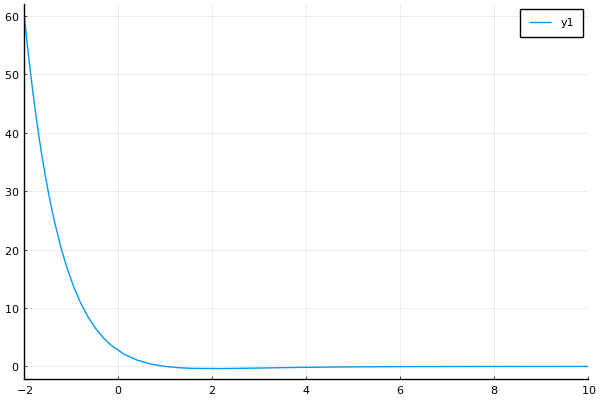

In [256]:
B(x) = -(x-1)*exp(-(x-1))
plot(B, xlim=(-2, 10))

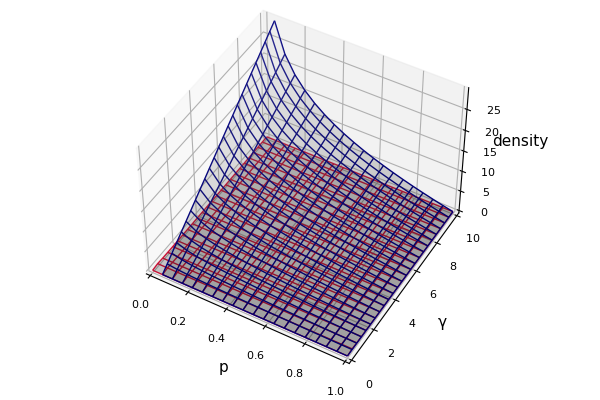

In [237]:
p_dist = Uniform(0, 1)

scale = 5
# Params refer to the underlying normal dist
γ_dist = LogNormal(0, scale)

joint_dist = product_distribution([p_dist, γ_dist])



p = range(0, 1, length=20)
γ = range(0, 10, length=25)
school_density = zeros(length(p), length(γ))
demand_density = copy(school_density)
for i in 1:length(p), j in 1:length(γ)
    school_density[i, j] = pdf(joint_dist, [p[i], γ[j]])
    demand_density[i, j] = -γ[j]*log(p[i])
end

pl = plot(xlabel="p", ylabel="γ", zlabel="density", camera=(30, 45), colorbar=false)
wireframe!(pl, p, γ, school_density', lc=:crimson)
surface!(pl, p, γ, school_density', fillalpha=0.2, c=:grays)


wireframe!(pl, p, γ, demand_density', lc=:navy)
surface!(pl, p, γ, demand_density', fillalpha=0.2, c=:grays)

In [230]:
dnsty

5×50 Matrix{Float64}:
 0.0  0.371705  0.192367  0.129695  …  0.00750997  0.00733946  0.0071761
 0.0  0.371705  0.192367  0.129695     0.00750997  0.00733946  0.0071761
 0.0  0.371705  0.192367  0.129695     0.00750997  0.00733946  0.0071761
 0.0  0.371705  0.192367  0.129695     0.00750997  0.00733946  0.0071761
 0.0  0.371705  0.192367  0.129695     0.00750997  0.00733946  0.0071761

In [158]:
vcat(fill(pdf.(dist, γ)', L)...)

100×100 Matrix{Float64}:
 0.0  0.0174783  0.0673428  0.11864  …  0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864  …  0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864  …  0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 0.0  0.0174783  0.0673428  0.11864     0.0178973  0.0174824  0.0170793
 ⋮                                   ⋱ 

In [136]:
using LinearAlgebra; using ForwardDiff: gradient, hessian                           # Imports
n, m = 30, 10                                                                       # Problem size
A = rand(m, n); b = rand(m)                                                         # Constraint Ax = b
Q = Symmetric(rand(n, n))^2; p = rand(n)                                            # Objective function
f(x) = exp(x' * Q * x + p' * x)
step(x) = x + ([hessian(f, x) A'; A zeros(m, m)]\[-gradient(f, x); zeros(m)])[1:n]  # Newton update step
x_star = ∘(fill(step, 20)...)(A\b)                                                  # Iterate

30-element Vector{Float64}:
  0.11637480502338625
  0.3567191343763372
 -0.3190694829834194
  0.07845532151222381
 -0.7142101036593582
  1.1180150352427303
 -0.1783749192103707
  0.8146534676302453
 -0.1685230212692783
  0.16330293575856097
  0.4556909728910321
  0.7568066961106564
 -0.11915000475901527
  ⋮
 -0.7216377523404293
  0.3545985136944578
 -0.19867440371790213
 -0.28085094926699944
 -0.54355747129235
 -0.01694872818425724
  0.2573735898948315
  0.24018551736555527
 -0.1057744396692224
 -0.4762510941807731
 -0.3363958292810486
 -0.040589098508805925

In [138]:
μ = A' \ -gradient(f, x_star)
all(isapprox.(A' * μ + gradient(f, x_star), 0, atol=1e-5))

true

In [124]:
eigen(Q)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 0.1577698558625782
 0.22742836913543754
 0.5348484967380411
 5.488398221729666
vectors:
4×4 Matrix{Float64}:
 -0.486084    0.182704   0.819427    -0.242655
  0.751383    0.406914   0.214951    -0.472907
  0.0180374  -0.770514  -0.00617607  -0.637138
 -0.445894    0.455356  -0.531317    -0.558151

In [111]:
gradient(f, x_star)

4-element Vector{Float64}:
 0.26772980948812763
 0.03663256203954279
 0.7852036103113184
 0.5421008233667556

In [102]:
A * (x_star) - b

2-element Vector{Float64}:
 -1.1102230246251565e-16
  0.0

In [98]:
[-gradient(f, res); zeros(m)]

15-element Vector{Float64}:
 -0.44541702004964057
 -0.47974979818765207
 -0.595907325405745
 -0.3868651015354655
 -1.2104016445376669
 -0.865463959498225
 -0.7817417592395305
 -0.5090243883838215
 -1.0652931241608414
 -0.07695405613407749
  0.0
  0.0
  0.0
  0.0
  0.0

In [50]:
m = 6
prices = rand(m)
quantities = 1 .+ rand(m)
demand(prices) = 1 ./ prices
update(prices) = (prices + 0.5*(demand(prices) .- quantities))
Fⁿ(x, n) = ∘(fill(update, n)...)(x)
@show equilibrium = Fⁿ(prices, 50)
# equilibrium = Fⁿ(prices, 50) = [0.5086155857976737, 0.6478537179305888, 0.7804529267779775, 0.6460790380486849, 0.9611891081266686, 0.6886777705264078]

equilibrium = Fⁿ(prices, 50) = [0.5086155857976737, 0.6478537179305888, 0.7804529267779775, 0.6460790380486849, 0.9611891081266686, 0.6886777705264078]

6-element Vector{Float64}:
 0.5086155857976737
 0.6478537179305888
 0.7804529267779775
 0.6460790380486849
 0.9611891081266686
 0.6886777705264078

In [54]:
function Fn(x, n)
    res = Vector{Float64}[x]
    for i in 1:n
        push!(res, update(res[end]))
    end
    return res
end

Fn (generic function with 1 method)

In [55]:
Fn(prices, 50)

51-element Vector{Vector{Float64}}:
 [0.9282974554161081, 0.028757554867407498, 0.8805923994671276, 0.9642770579434536, 0.8913219692143026, 0.8341694922609677]
 [0.48040256049820984, 16.643713888432995, 0.8077383563838314, 0.7089011096638033, 0.9320974895186102, 0.7075391093047377]
 [0.5346809947535924, 15.90197609767373, 0.7860970546374022, 0.6403189825175113, 0.9483330658751631, 0.6881848745402775]
 [0.48330267728235954, 15.161639568037277, 0.7814972015076053, 0.6472806719838277, 0.9553849888655936, 0.6887048754433683]
 [0.5313357012161412, 14.422838369046776, 0.7806411288381438, 0.6458439792366371, 0.958545221676079, 0.688676301586617]
 [0.48584501349009845, 13.685726446364598, 0.78048667587836, 0.6461256444901744, 0.9599800216365653, 0.6886778501992443]
 [0.5284644390077926, 12.950481697929284, 0.7804589733123685, 0.6460698214711764, 0.9606351951576886, 0.6886777662052752]
 [0.4880865429040534, 12.217311137688544, 0.7804540099070718, 0.6460808616111126, 0.9609351419369819, 0.688677

In [26]:
quantities

10-element Vector{Float64}:
 0.49602883295485345
 0.9247377026847421
 0.9929862487107648
 0.14369507793270908
 0.6753099802652036
 0.5146221685650052
 0.8167173238683338
 0.16147208506244848
 0.5085553681340764
 0.5656181610399473

In [8]:
demand(x)

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 11 and 10")

In [59]:
"""
    regulafalsi(f, x1, x2, nit)

Use the regula falsi method to find roots of `f` given starting points x1 and x2.
"""
function regulafalsi(f::Function,
                    x1::T,
                    x2::T;
                    maxit=25,
                    epsilon=Float16(1e-6),
                    verbose=false
                    )::Tuple{T, T} where T<:AbstractFloat

    max_ub_search = 25
    y1, y2 = f(x1), f(x2)
    
    h = 0
    while y2 < 0 && h < max_ub_search
        h += 1
        x2 *= 2
        y2 = f(x2)
    end
    
    h == max_ub_search ? @warn("Failed to find an upper bound after $h doublings") : nothing
    
    x3, y3 = x2, y2
    
    i = 0
    while i < maxit && abs(y2) > epsilon && !(x1 == x2)
        i += 1
        
        x3 = x2
        # Prevent NaN if we hit the zero exactly
        if (dy = y2 - y1) != 0
            x3 = max(0 + epsilon, x1 - y1 * (x2 - x1) / dy)
        end
        y3 = f(x3)
        @show x1, x2, x3
        @show y1, y2, y3
        
        if y3 < 0
            # New LB; keep UB. 
            x1, x2 = x3, x2
            y1, y2 = y3, y2
        else
            # New UB; keep LB. 
            x1, x2 = x1, x3
            y1, y2 = y1, y3
        end
    end
    
    verbose && println("  Iterations in regula falsi: $i")
    
    return x3, y3
end


"""
    sigmainvopt(market, p; x1, x2, maxit=25, epsilon=1e-5, verbose=false, heuristic=false)

Estimate the selectivity parameter ``σ`` for each school such that the given cutoffs are 
an equilibrium, when school's objective functions are ``u_c(p_c) = \\log D_c + σ \\log p_c``.
Returns the vector of ``σ``-values and an error vector.

If `heuristic=true`, uses the
"cloud hopping" heuristic (see `?bestresponse_it`). 
"""
function sigmainvopt_(market::Market{T},
                     p::Array{T, 1};
                     x1=nothing::Union{Nothing, Array{T, 1}},
                     x2=nothing::Union{Nothing, Array{T, 1}}, 
                     maxit=10::Int,
                     epsilon=Float16(1e-5),
                     verbose=false::Bool,
                     heuristic=false::Bool
                     )::Tuple{Vector{T}, Vector{T}} where T<:AbstractFloat
    
    if x1 === nothing
        x1 = fill(T(0), length(market))
    end
    
    if x2 === nothing
        x2 = fill(T(1 - 1e-5), length(market))
    end
    
    global_sort_order = sortperm(p)
    
    res = zeros(T, length(market))
    err = zeros(T, length(market))
    
    for (c, pc) in enumerate(p)
        verbose && @show c
        if pc == 0
            res[c] = 0
        else
            function f(x::T)::T
                return brforc(c, global_sort_order, market,
                              x/(1-x),
                              p,
                              heuristic=heuristic) - p[c]
            end
            
            res[c], err[c] = regulafalsi(f, x1[c], x2[c];
                                       maxit=maxit,
                                       epsilon=epsilon,
                                       verbose=verbose)
        end
    end
    
#     res = res ./ (1 .+ res)
    return res, err
end

sigmainvopt_

In [62]:
U = Float32
C = 20
mkt = Market(randn(U, C), fill(U(Inf), C))
mkt_p = rand(U, C)
res, err = sigmainvopt_(mkt, mkt_p, verbose=true)

c = 4


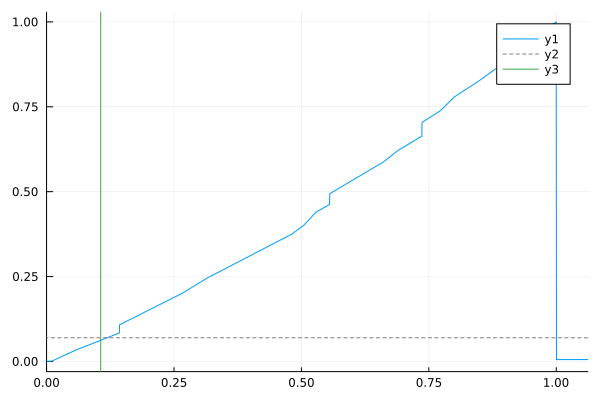

In [63]:
let c = 4# argmax(res)
    @show c
    global_sort_order = sortperm(mkt_p)
    
    function brc(x)::U
        x = convert(U, x)
        return brforc(c, global_sort_order, mkt, x/(1-x), mkt_p,
                      heuristic=false)
    end
    
    pl = plot(brc, xlim = (0,res[c]*10))
    hline!(pl, [mkt_p[c]], lc=:gray50, ls=:dash)
    vline!(pl, [res[c]]) 
end

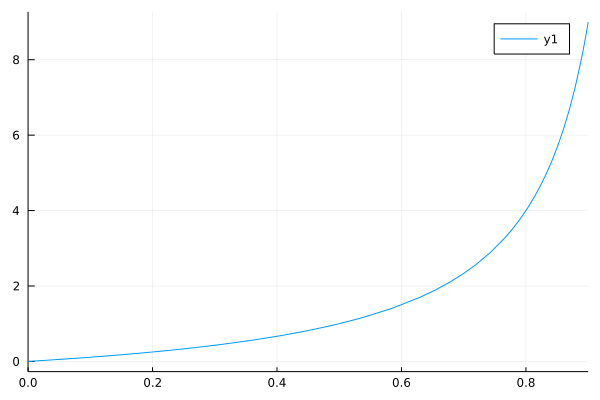

In [32]:
f(x) = x/(x+1)
g(y) = y/(1-y)

plot(g, xlim= (0,.9))